In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import LinearSVC
from sklearn.cluster import DBSCAN

In [2]:
y = np.array([ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1,
     1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1])

x = np.array([[0.094128, 0.333981, 0.46835, 0.995641, 0.739581],
 [0.113254, 0.196173, 0.496645, 0.950884, 0.388173],
 [0.045382, 0.154497, 0.527051, 0.992132, 0.505884],
 [0.033021, 0.469827, 0.47808, 0.962484, 0.544174],
 [0.121308, 0.52081, 0.615215, 0.978913, 0.533457],
 [0.142126, 0.333985, 0.727274, 0.977759, 0.679125],
 [0.020281, 0.467942, 0.565414, 0.996128, 0.951096],
 [0.110687, 0.379747, 0.517803, 0.989531, 0.573592],
 [0.023518, 0.308972, 0.309716, 0.957676, 0.627981],
 [0.378282, 0.471542, 0.828432, 0.924927, 0.136859],
 [0.149238, 0.687459, 0.839423, 0.804331, 0.449794],
 [0.059971, 0.149196, 0.322004, 0.966295, 0.837838],
 [0.057201, 0.288546, 0.579544, 0.997802, 0.942594],
 [0.108501, 0.541329, 0.785262, 0.972868, 0.604562],
 [0.045382, 0.163913, 0.415992, 0.979117, 0.660901],
 [0.053275, 0.551109, 0.584299, 0.987044, 0.575415],
 [0.193013, 0.266126, 0.669146, 0.893537, 0.469507],
 [0.216444, 0.436391, 0.538461, 0.949193, 0.801654],
 [0.08403, 0.5365, 0.555386, 0.930668, 0.521049],
 [0.297373, 0.488406, 0.639552, 0.82482, 0.108272],
 [0.05208, 0.353153, 0.694577, 0.997546, 0.871548],
 [0.062288, 0.23907, 0.501786, 0.997972, 0.94685],
 [0.051261, 0.498289, 0.572681, 0.976696, 0.368675],
 [0.0617, 0.247266, 0.530017, 0.991894, 0.536928],
 [0.15621, 0.767971, 0.82983, 0.971684, 0.344136],
 [0.075949, 0.185496, 0.445216, 0.993202, 0.735547],
 [0.092614, 0.155384, 0.462681, 0.988, 0.647555],
 [0.055771, 0.227993, 0.564014, 0.947387, 0.358195],
 [0.176323, 0.792885, 0.98558, 0.874177, 0.504373],
 [0.121776, 0.235151, 0.320237, 0.969158, 0.784045],
 [0.060007, 0.49645, 0.646217, 0.990124, 0.834634],
 [0.025914, 0.145551, 0.423204, 0.988346, 0.628573],
 [0.04777, 0.137141, 0.314509, 0.8934, 0.553398],
 [0.061611, 0.344769, 0.469204, 0.992688, 0.68889],
 [0.154412, 0.400407, 0.698772, 0.978006, 0.361147],
 [0.337423, 0.564323, 0.687203, 0.888813, 0.110962],
 [0.091239, 0.202053, 0.353337, 0.985287, 0.705413],
 [0.034729, 0.398753, 0.452303, 0.970124, 0.710928],
 [0.090627, 0.150713, 0.532602, 0.995769, 0.70603],
 [0.080077, 0.287977, 0.642381, 0.982017, 0.361241],
 [0.122426, 0.572804, 0.908484, 0.82837, 0.535753],
 [0.024987, 0.097072, 0.130242, 0.787256, 0.804989],
 [0.033267, 0.139764, 0.315416, 0.781853, 0.475837],
 [0.088468, 0.335715, 0.609886, 0.981661, 0.549648],
 [0.099405, 0.211547, 0.41389, 0.966572, 0.647288],
 [0.207576, 0.759449, 0.833859, 0.782098, 0.513521],
 [0.09744, 0.299899, 0.452332, 0.990773, 0.695088],
 [0.057004, 0.232534, 0.436181, 0.935198, 0.39483],
 [0.060033, 0.445277, 0.494401, 0.995656, 0.806298],
 [0.10949, 0.183698, 0.3688, 0.861722, 0.533991],
 [0.096308, 0.50195, 0.808318, 0.835994, 0.579407],
 [0.058642, 0.57183, 0.561185, 0.995874, 0.942163],
 [0.090521, 0.573341, 0.757629, 0.979983, 0.337943],
 [0.102603, 0.602466, 0.654713, 0.988849, 0.788743],
 [0.036577, 0.483369, 0.76885, 0.950928, 0.997015],
 [0.323621, 0.641709, 0.843354, 0.832529, 0.095907],
 [0.02996, 0.125734, 0.340921, 0.968241, 0.593013],
 [0.052732, 0.356403, 0.464446, 0.985075, 0.78841],
 [0.109534, 0.273354, 0.299064, 0.98513, 0.697086],
 [0.104566, 0.224832, 0.737294, 0.957048, 0.499365],
 [0.107533, 0.311843, 0.401637, 0.864252, 0.249262],
 [0.113331, 0.304207, 0.3229, 0.952269, 0.5463, ],
 [0.044399, 0.474862, 0.768858, 0.833458, 0.641192],
 [0.060121, 0.446525, 0.64682, 0.968014, 0.548547],
 [0.130991, 0.461144, 0.874657, 0.942622, 0.581901],
 [0.023686, 0.236681, 0.448037, 0.989621, 0.680633],
 [0.044251, 0.560466, 0.586592, 0.992862, 0.750738],
 [0.223316, 0.34644, 0.758095, 0.879004, 0.125967],
 [0.09254, 0.311833, 0.5068, 0.990647, 0.59701],
 [0.115322, 0.327465, 0.695621, 0.979622, 0.49965],
 [0.257077, 0.605903, 0.765878, 0.860906, 0.087724],
 [0.149266, 0.727173, 0.824395, 0.967406, 0.472287],
 [0.04564, 0.444244, 0.714342, 0.880337, 0.490779],
 [0.129594, 0.211677, 0.368069, 0.980338, 0.531691],
 [0.129718, 0.287302, 0.463714, 0.961911, 0.536132],
 [0.115808, 0.51866, 0.53297, 0.994687, 0.762086],
 [0.127185, 0.733141, 0.810347, 0.950438, 0.44805],
 [0.338444, 0.686291, 0.83595, 0.910374, 0.757723],
 [0.055668, 0.29189, 0.487796, 0.960284, 0.442398],
 [0.047634, 0.180182, 0.401283, 0.97238, 0.563715],
 [0.034795, 0.243201, 0.867983, 0.697722, 0.409741],
 [0.057722, 0.376804, 0.448976, 0.931607, 0.328725],
 [0.138262, 0.322455, 0.627139, 0.985053, 0.517069],
 [0.261651, 0.256929, 0.832453, 0.974189, 0.380015],
 [0.169555, 0.614334, 0.66626, 0.979777, 0.507125],
 [0.306888, 0.734974, 0.899233, 0.959314, 0.174448],
 [0.367135, 0.597404, 0.930407, 0.913069, 0.105024],
 [0.099616, 0.374704, 0.523005, 0.966141, 0.449025],
 [0.152878, 0.627343, 0.703948, 0.975656, 0.460824],
 [0.140675, 0.415059, 0.702265, 0.979959, 0.747585],
 [0.043852, 0.303381, 0.480977, 0.992106, 0.626636],
 [0.025053, 0.388275, 0.615893, 0.998066, 0.89957],
 [0.064649, 0.374447, 0.609823, 0.981092, 0.522892],
 [0.047495, 0.29058, 0.372557, 0.941592, 0.873504],
 [0.077611, 0.597353, 0.89978, 0.959566, 0.542722],
 [0.184739, 0.416708, 0.680933, 0.98247, 0.38448],
 [0.259283, 0.343291, 0.650035, 0.802793, 0.092747],
 [0.047298, 0.187725, 0.413301, 0.919268, 0.608766],
 [0.151021, 0.664823, 0.732194, 0.972343, 0.504531],
 [0.060111, 0.266663, 0.413468, 0.997076, 0.772744],
 [0.205507, 0.325885, 0.362638, 0.306056, 0.164185],
 [0.101637, 0.661205, 0.859781, 0.982875, 0.440511],
 [0.040361, 0.288461, 0.459157, 0.983621, 0.658939],
 [0.055131, 0.222233, 0.507031, 0.998375, 0.984391],
 [0.036563, 0.215645, 0.428226, 0.962462, 0.700194],
 [0.123848, 0.421937, 0.875455, 0.962957, 0.616133],
 [0.052614, 0.184156, 0.271269, 0.813098, 0.500783],
 [0.051248, 0.28731, 0.373575, 0.972762, 0.749346],
 [0.314437, 0.873825, 0.94672, 0.823525, 0.354931],
 [0.118661, 0.408623, 0.516408, 0.994203, 0.921877],
 [0.039582, 0.247633, 0.451058, 0.984824, 0.59726],
 [0.057482, 0.093871, 0.41258, 0.987621, 0.60862],
 [0.09785, 0.634724, 0.736303, 0.965966, 0.195017]])

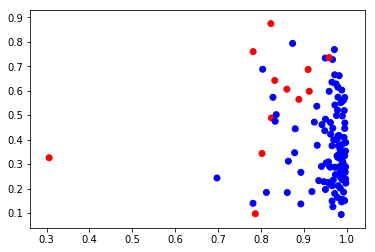

In [19]:
colors = ['red' if yy == -1 else 'blue' for yy in y]

plt.scatter(x[:, 3], x[:, 1], color=colors)

In [4]:
# local context for each outlier consisting of normal instances
inliners = x[y == 1]
outliers = x[y == -1]
n_neigh = int(len(inliners) / len(outliers))
n_neigh = 30

In [5]:
n_neigh

30

In [6]:
nbrs = NearestNeighbors(n_neighbors=n_neigh, algorithm='kd_tree', metric='euclidean').fit(inliners)

In [18]:
distances, neighbors = nbrs.kneighbors(outliers)
distances

array([[0.20722028, 0.23096524, 0.31309109, 0.34510925, 0.34739573,
        0.37519089, 0.38111721, 0.39498932, 0.40768837, 0.41964455,
        0.43384769, 0.43746263, 0.44315682, 0.44911403, 0.4575769 ,
        0.45988059, 0.46476231, 0.46751638, 0.4693688 , 0.48369313,
        0.48631352, 0.48699911, 0.48921233, 0.48980469, 0.49578194,
        0.49925853, 0.5000604 , 0.50203289, 0.50882835, 0.51416107],
       [0.17943879, 0.25659394, 0.27889095, 0.35473101, 0.35878355,
        0.36199896, 0.39483014, 0.41018764, 0.41653797, 0.44237013,
        0.44310151, 0.44833984, 0.45308933, 0.45688507, 0.46066748,
        0.46468231, 0.46634476, 0.46676936, 0.46840173, 0.48854743,
        0.48962713, 0.49030744, 0.49459641, 0.50227586, 0.51461254,
        0.5217052 , 0.525317  , 0.52854675, 0.53866222, 0.54281484],
       [0.27174892, 0.31314375, 0.33263117, 0.33810261, 0.34281421,
        0.34848901, 0.35060131, 0.35381128, 0.36551293, 0.37079576,
        0.37961656, 0.38019838, 0.38035136, 0.

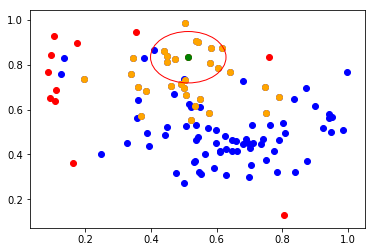

In [23]:
colors = ['red' if yy == -1 else 'blue' for yy in y]
dimx = 4
dimy = 2
out_num = 3
out_neigh = neighbors[out_num]

min_dist = min(distances[out_num])
circle1 = plt.Circle((outliers[out_num, dimx], outliers[out_num, dimy]), min_dist, color='r', fill=False)
plt.gcf().gca().add_artist(circle1)

plt.scatter(outliers[:, dimx], outliers[:, dimy], color='red')
plt.scatter(inliners[:, dimx], inliners[:, dimy], color='blue')
plt.scatter(inliners[out_neigh, dimx], inliners[out_neigh, dimy], color='orange')
plt.scatter(outliers[out_num, dimx], outliers[out_num, dimy], color='green')

In [9]:
n_dimens = len(outliers[0])
n_samples = 5
# min_dist zamiast 0.01?
resampled = np.random.normal(outliers[out_num].tolist(), [0.01 for _ in range(n_dimens)], (n_samples, n_dimens))
np.append(resampled, outliers[out_num,:])

array([0.22072837, 0.7429213 , 0.82181518, 0.77872779, 0.51543404,
       0.20102507, 0.76240926, 0.8219793 , 0.7804716 , 0.50390287,
       0.20179851, 0.77589382, 0.83165262, 0.77763716, 0.50423124,
       0.2059011 , 0.74472601, 0.8464217 , 0.79278684, 0.50968352,
       0.19185335, 0.77041182, 0.84243906, 0.78256933, 0.49445439,
       0.207576  , 0.759449  , 0.833859  , 0.782098  , 0.513521  ])

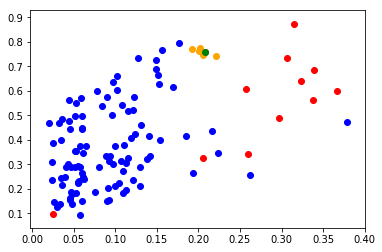

In [10]:
colors = ['red' if yy == -1 else 'blue' for yy in y]
dimx = 0
dimy = 1
out_num = 3
out_neigh = neighbors[out_num]

plt.scatter(outliers[:, dimx], outliers[:, dimy], color='red')
plt.scatter(inliners[:, dimx], inliners[:, dimy], color='blue')
plt.scatter(resampled[:, dimx], resampled[:, dimy], color='orange')
plt.scatter(outliers[out_num, dimx], outliers[out_num, dimy], color='green')

In [11]:
context = inliners[out_neigh,:]

In [12]:
db = DBSCAN(eps=0.1, min_samples=3).fit(context)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [13]:
components = db.components_

In [14]:
len(context)

30

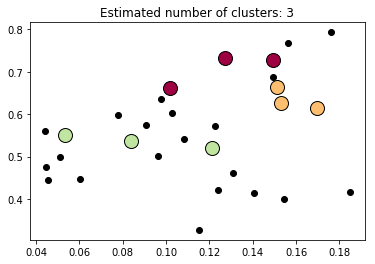

In [15]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = context[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = context[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [4]:
from utils import 

In [64]:
utils.explain(1,2,3)

AttributeError: module 'utils' has no attribute 'explain'

In [67]:
o = Coin.Coin(1, 2, 3)

TypeError: __init__() takes 1 positional argument but 4 were given

In [66]:
o.explain(1, 2)

TypeError: explain() takes 2 positional arguments but 3 were given

In [68]:
print(Coin.__init__

<module 'utils.Coin' from '/Users/agnieszkamiszkurka/Documents/studia/inzynierka/serious stuff/repo/utils/Coin.py'>


NameError: name 'Coin' is not defined